In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# plotting distribution of Flights

In [2]:
df=pd.read_excel('Cleaned_Data.xlsx')

In [3]:
df

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445
2,2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140
3,3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25,325
4,4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25,2,30,150
10678,10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20,2,35,155
10679,10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,27,4,2019,8,20,11,20,3,0,180
10680,10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10,2,40,160


In [4]:
def divide_timeOftheDay(time):
    if(time>=4) and (time<=8):
        return "Early Morning"
    elif(time>8)and (time<12):
        return "Morning"
    elif(time>=12) and (time<16):
        return "Afternoon"
    elif (time>=16) and (time<20):
        return "Evening"
    elif (time>=20) and (time<=24):
        return "Night"
    else:
        return "late night"

<Axes: xlabel='Dep_Time_hour'>

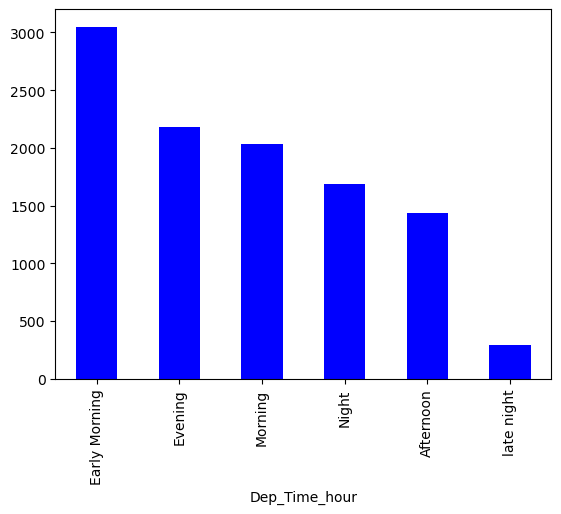

In [5]:
df['Dep_Time_hour'].apply(divide_timeOftheDay).value_counts().plot(kind='bar', color="b")

In [6]:
import plotly

In [7]:
import cufflinks as cf

In [8]:
from cufflinks.offline import go_offline
from plotly.offline import plot , iplot , init_notebook_mode , download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [9]:
df['Dep_Time_hour'].apply(divide_timeOftheDay).value_counts().iplot(kind="bar")

# Distribution of Flights according to price vs duration

In [10]:
import seaborn as sns

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

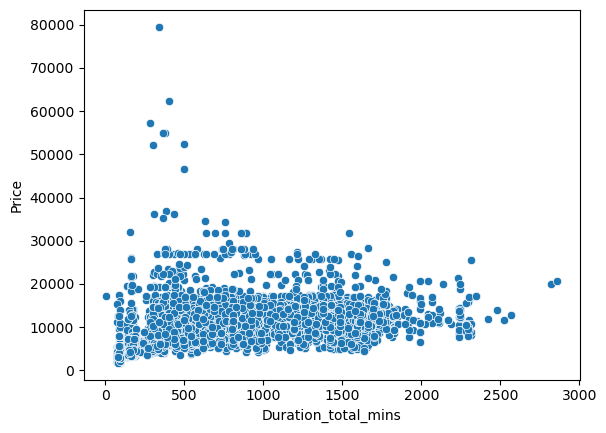

In [11]:
sns.scatterplot(x='Duration_total_mins', y='Price',data=df)

/home/atharva/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



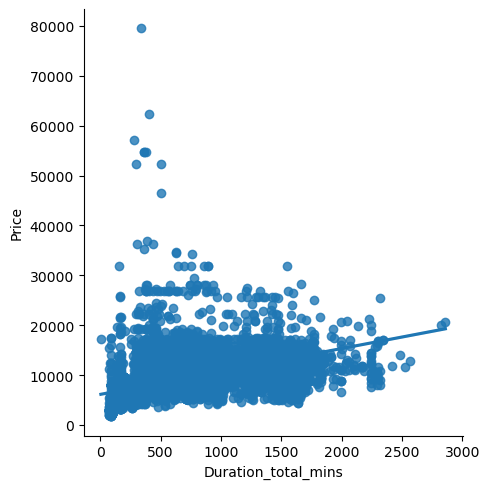

In [12]:
sns.lmplot(x="Duration_total_mins" , y="Price" , data=df)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

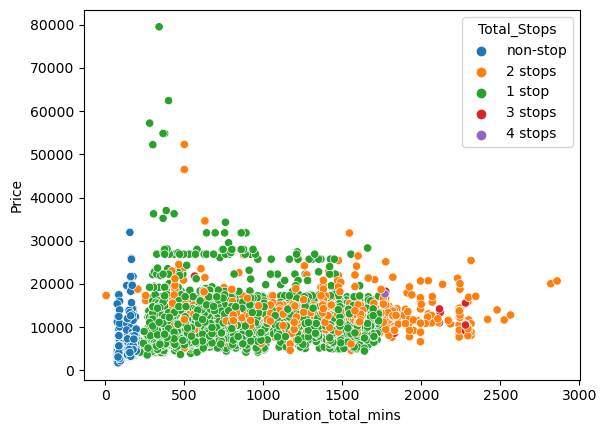

In [13]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , hue="Total_Stops", data=df)

<Axes: xlabel='Duration_total_mins', ylabel='Total_Stops'>

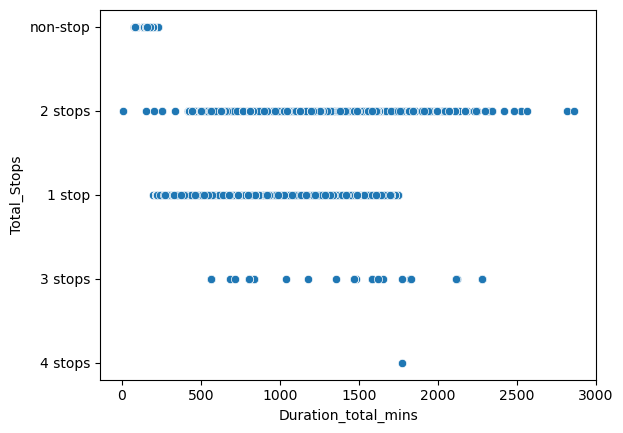

In [14]:
sns.scatterplot(x="Duration_total_mins" , y="Total_Stops" , data=df)

<Axes: xlabel='Price', ylabel='Airline'>

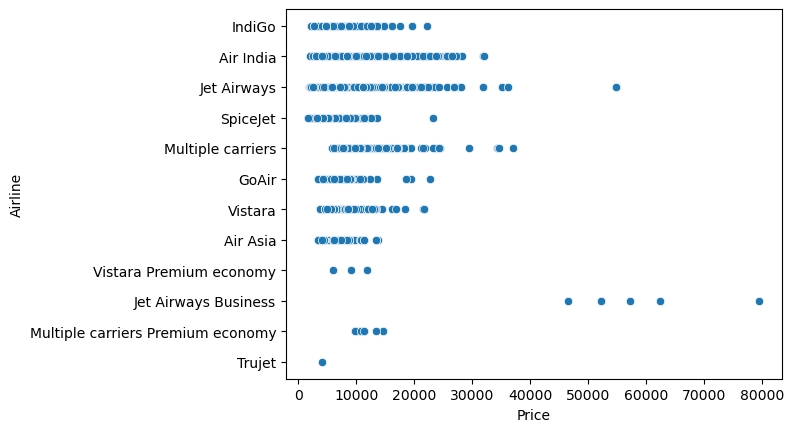

In [15]:
sns.scatterplot(x="Price" , y="Airline" , data=df)

<Axes: xlabel='Price', ylabel='Route'>

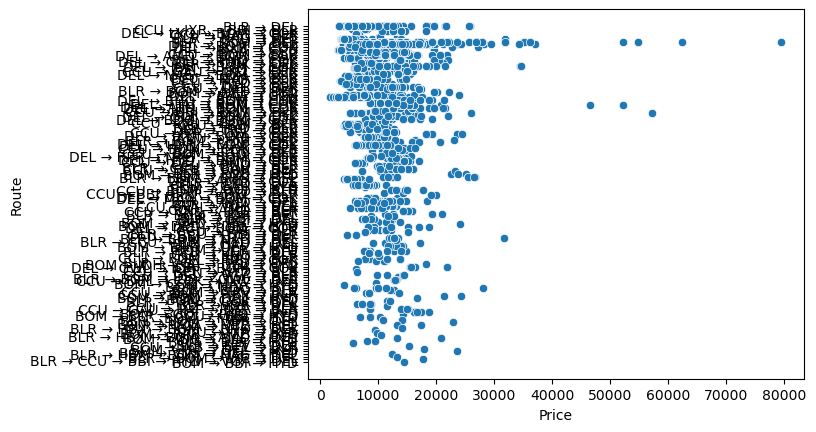

In [19]:
sns.scatterplot(x="Price" , y="Route" , data=df)

In [24]:
len(df['Route'].unique())

128

In [41]:
most_used_routes=df.groupby('Route').size().sort_values(ascending=False)

2376

In [34]:
def calculate_statistics(df):
    # Group the DataFrame by 'Route'
    grouped = df.groupby('Route')

    # Calculate average, median, and mode for 'Prices' in each group
    result = grouped['Price'].agg(['mean', 'median', lambda x: x.mode().iloc[0] if not x.mode().empty else None])

    # Rename the columns for clarity
    result = result.rename(columns={'mean': 'Average Price', 'median': 'Median Price', '<lambda_0>': 'Mode Price'})

    return result

In [35]:
res=calculate_statistics(df)

In [36]:
res

,Average Price,Median Price,Mode Price
Route,,,
BLR → AMD → DEL,11134.166667,11632.5,10008
BLR → BBI → DEL,11486.000000,11654.0,11654
BLR → BDQ → DEL,11550.500000,10037.0,10037
BLR → BOM → AMD → DEL,14751.600000,17135.0,17135
BLR → BOM → BHO → DEL,17211.545455,12725.0,12725
...,...,...,...
DEL → PNQ → COK,6602.071429,5495.0,4760
DEL → RPR → NAG → BOM → COK,10891.411765,10703.0,10703
DEL → TRV → COK,7835.625000,7051.0,6587


<Axes: xlabel='Route', ylabel='Price'>

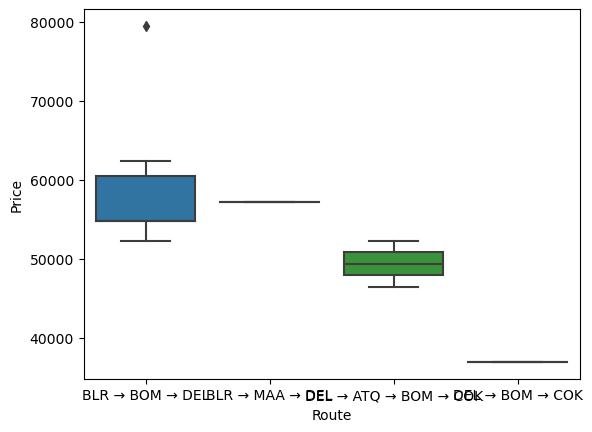

In [39]:
sns.boxplot(y='Price' , x='Route' , data=df.sort_values('Price' , ascending=False).head(10))

In [52]:
top_10_expensive_routes=df.sort_values('Price' , ascending=False).head(10)['Route']

In [60]:
top_10_expensive_routes

2924           BLR → BOM → DEL
5372           BLR → BOM → DEL
10363          BLR → MAA → DEL
1478           BLR → BOM → DEL
5439           BLR → BOM → DEL
2618           BLR → BOM → DEL
9714     DEL → ATQ → BOM → COK
657            BLR → BOM → DEL
7351     DEL → ATQ → BOM → COK
396            DEL → BOM → COK
Name: Route, dtype: object

In [55]:
def count_of_route(df,routes):
    count_of_routes=[]
    for i in routes:
        count_of_routes.append((df['Route']==i).sum()) 
        
    return count_of_routes

In [57]:
countOfRoute=count_of_route(df,top_10_expensive_routes)

<Axes: ylabel='Route'>

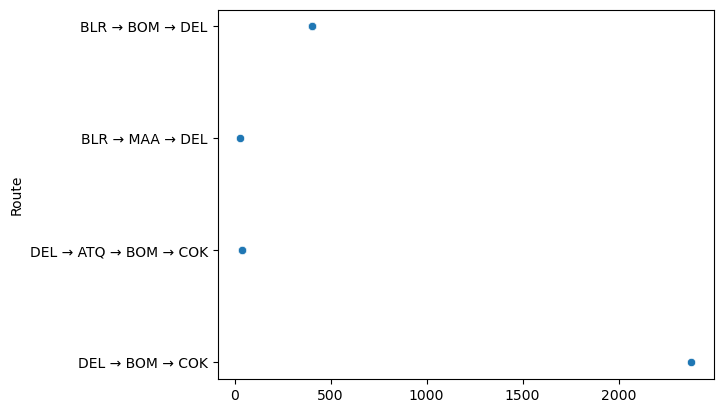

In [59]:
sns.scatterplot(x=countOfRoute,y=top_10_expensive_routes)

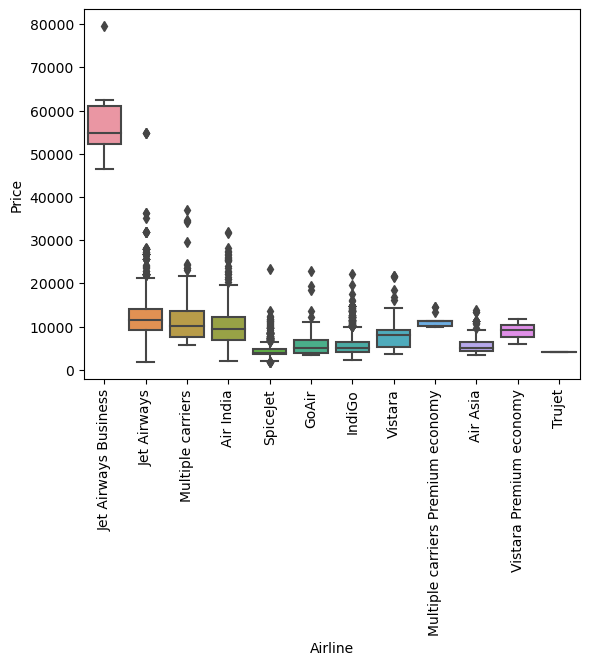

In [49]:
sns.boxplot(y='Price' , x='Airline' , data=df.sort_values('Price' , ascending=False))
plt.xticks(rotation="vertical")
plt.show()